In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#pip install graphviz

In [3]:
#pip install imblearn


In [4]:
df= pd.read_csv('Sentiment_Analysis_Data.csv')

In [5]:
df.head()

,Unnamed: 0,Index,Title,Author,ID,Created,Original_Title,Without_stopwords,Lemmatized_Words,Pos_tags,...,PCA1,PCA2,For_Cluster_Seven,For_Cluster_Ten,neg,neu,pos,compound,Sentiment,Sentiment_Label
0,0,0,"['apple', 'vision', 'pro', 'has', 'ruined', 'm...",Old_Possible8977,1an21fb,2024-02-09 23:34:09,Apple Vision Pro has ruined movies for me,"['apple', 'vision', 'pro', 'ruined', 'movies']","['apple', 'vision', 'pro', 'ruined', 'movies']","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.369651,0.018061,0,1,0.279,0.541,0.18,-0.2732,-1,negative
1,1,1,"['its', 'too', 'expensive', 'no', 'regrets']",McNerdsAlot,1akdyzo,2024-02-06 16:35:52,It’s too expensive. No regrets.,"['expensive', 'regrets']","['expensive', 'regrets']","[('[', 'RB'), (""'expensive"", 'JJ'), (""'"", ""''""...",...,-0.054405,-0.046932,1,5,0.610,0.390,0.00,-0.5719,-1,negative
2,2,2,"['how', 'to', 'ruin', 'your', 'movie', 'library']",Mequbbal_Trader,1atvcqx,2024-02-18 14:31:17,How to ruin your movie library,"['ruin', 'movie', 'library']","['ruin', 'movie', 'library']","[('[', 'JJ'), (""'ruin"", 'NNP'), (""'"", 'POS'), ...",...,-0.068477,-0.067856,1,5,0.432,0.568,0.00,-0.5859,-1,negative
3,3,3,"['i', 'was', 'really', 'wrong', 'about', 'the'...",AppleBottmBeans,1amtycf,2024-02-09 17:45:25,I was REALLY wrong about the AVP. This is the ...,"['really', 'wrong', 'avp', 'incredible', 'piec...","['really', 'wrong', 'avp', 'incredible', 'piec...","[('[', 'RB'), (""'really"", 'RB'), (""'"", ""''""), ...",...,-0.113431,0.092884,4,9,0.205,0.795,0.00,-0.6281,-1,negative
4,4,4,"['apple', 'vision', 'pro', 'is', 'the', 'best'...",Deathtosnoopy,1b2jq3m,2024-02-28 22:35:12,Apple vision pro is the best thing to happen t...,"['apple', 'vision', 'pro', 'best', 'thing', 'h...","['apple', 'vision', 'pro', 'best', 'thing', 'h...","[('[', 'JJ'), (""'apple"", 'NNP'), (""'"", 'POS'),...",...,0.209062,-0.007999,0,1,0.000,0.640,0.36,0.7351,1,positive


In [6]:
# Split the data into features (X) and labels (y)
X = df['Lemmatized_Words']
y = df['Sentiment_Label']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.to_csv('Training_Data_DT.csv')

In [9]:
X_test.to_csv('Test_Data_DT.csv')

In [10]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [11]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_counts, y_train)

In [12]:
# Kernel 1  # C= 1

In [13]:
# Train the decision tree classifier
svm = SVC(kernel='linear', random_state=42, C=1.0)
svm.fit(X_train_counts, y_train)

SVC(kernel='linear', random_state=42)

In [14]:
y_pred_linear_1 = svm.predict(X_test_counts)

In [15]:
accuracy = accuracy_score(y_test, y_pred_linear_1)
print("Accuracy:", accuracy)

Accuracy: 0.92


In [16]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_linear_1, pos_label='positive')
print("Precision:", precision)

Precision: 0.93717277486911


In [17]:
recall = recall_score(y_test, y_pred_linear_1, pos_label='positive')
print("Recall:", recall)

Recall: 0.9781420765027322


In [18]:
f1 = f1_score(y_test, y_pred_linear_1, pos_label='positive')
print("F1 Score:", f1)



F1 Score: 0.9572192513368983


In [19]:
print("For Kernel = Linear & C = 1.0")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

For Kernel = Linear & C = 1.0
Accuracy: 0.92
Precision: 0.93717277486911
Recall: 0.9781420765027322
F1 Score: 0.9572192513368983


In [20]:
# Kernel 1  # C= 10

In [21]:
# Train the decision tree classifier
svm_l2 = SVC(kernel='linear', random_state=42, C=10.0)
svm_l2.fit(X_train_counts, y_train)

SVC(C=10.0, kernel='linear', random_state=42)

In [22]:
y_pred_linear_2 = svm_l2.predict(X_test_counts)

In [23]:
accuracy_l2 = accuracy_score(y_test, y_pred_linear_2)
print("Accuracy:", accuracy_l2)

Accuracy: 0.92


In [24]:
# Calculate precision, recall, and F1-score
precision_l2 = precision_score(y_test, y_pred_linear_2, pos_label='positive')
print("Precision:", precision_l2)

Precision: 0.9417989417989417


In [25]:
recall_l2 = recall_score(y_test, y_pred_linear_2, pos_label='positive')
print("Recall:", recall_l2)

Recall: 0.9726775956284153


In [26]:
f1_l2 = f1_score(y_test, y_pred_linear_2, pos_label='positive')
print("F1 Score:", f1_l2)

F1 Score: 0.956989247311828


In [27]:
print("For Kernel = Linear & C = 10")
print("Accuracy:", accuracy_l2)
print("Precision:", precision_l2)
print("Recall:", recall_l2)
print("F1 Score:", f1_l2)

For Kernel = Linear & C = 10
Accuracy: 0.92
Precision: 0.9417989417989417
Recall: 0.9726775956284153
F1 Score: 0.956989247311828


In [28]:
# Kernel 1  # C= 0.1

In [29]:
# Train the decision tree classifier
svm_l3 = SVC(kernel='linear', random_state=42, C=0.1)
svm_l3.fit(X_train_counts, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

In [30]:
y_pred_linear_3 = svm_l3.predict(X_test_counts)

In [31]:
accuracy_l3 = accuracy_score(y_test, y_pred_linear_3)
print("Accuracy:", accuracy_l3)

Accuracy: 0.915


In [32]:
# Calculate precision, recall, and F1-score
precision_l3 = precision_score(y_test, y_pred_linear_3, pos_label='positive')
print("Precision:", precision_l3)

Precision: 0.915


In [33]:
recall_l3 = recall_score(y_test, y_pred_linear_3, pos_label='positive')
print("Recall:", recall_l3)

Recall: 1.0


In [34]:
f1_l3 = f1_score(y_test, y_pred_linear_3, pos_label='positive')
print("F1 Score:", f1_l3)

F1 Score: 0.9556135770234987


In [35]:
print("For Kernel = Linear & C = 0.1")
print("Accuracy:", accuracy_l3)
print("Precision:", precision_l3)
print("Recall:", recall_l3)
print("F1 Score:", f1_l3)

For Kernel = Linear & C = 0.1
Accuracy: 0.915
Precision: 0.915
Recall: 1.0
F1 Score: 0.9556135770234987


In [36]:
# Example of predicting sentiment of a new text
new_text = "Apple Vision Pro is lovely"
print("New Comment: ",new_text)
new_text_processed = " ".join(new_text.split())  # Remove extra spaces if any
new_text_counts = vectorizer.transform([new_text_processed])
predicted_sentiment = svm.predict(new_text_counts)[0]
print("Predicted Sentiment:", predicted_sentiment)

New Comment:  Apple Vision Pro is lovely
Predicted Sentiment: positive


In [38]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_linear_3)

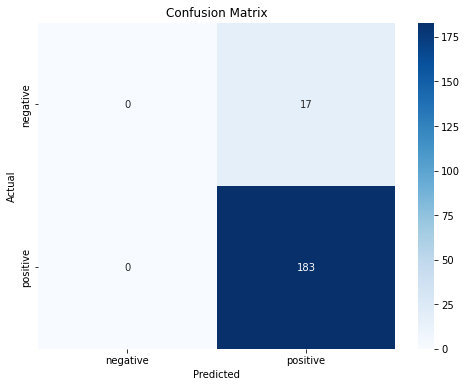

In [39]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# # Kernel 2  # C= 0.1   Polynomial

In [41]:
svm_poly1 = SVC(kernel='poly', random_state=42, C = 1.0)
svm_poly1.fit(X_train_counts, y_train)

SVC(kernel='poly', random_state=42)

In [42]:
y_pred_poly1 = svm_poly1.predict(X_test_counts)

In [43]:
accuracy_poly1 = accuracy_score(y_test, y_pred_poly1)
print("Accuracy:", accuracy_poly1)

Accuracy: 0.915


In [44]:
# Calculate precision, recall, and F1-score
precision_poly1 = precision_score(y_test, y_pred_poly1, pos_label='positive')
print("Precision:", precision_poly1)

Precision: 0.915


In [45]:
recall_poly1 = recall_score(y_test, y_pred_poly1, pos_label='positive')
print("Recall:", recall_poly1)

Recall: 1.0


In [46]:
f1_poly1 = f1_score(y_test, y_pred_poly1, pos_label='positive')
print("F1 Score:", f1_poly1)

F1 Score: 0.9556135770234987


In [47]:
print("For Kernel = Polynomial & C = 1")
print("Accuracy:", accuracy_poly1)
print("Precision:", precision_poly1)
print("Recall:", recall_poly1)
print("F1 Score:", f1_poly1)

For Kernel = Polynomial & C = 1
Accuracy: 0.915
Precision: 0.915
Recall: 1.0
F1 Score: 0.9556135770234987


In [48]:
# # Kernel 2  # C= 10   Polynomial

In [49]:
svm_poly2 = SVC(kernel='poly', random_state=42, C = 10)
svm_poly2.fit(X_train_counts, y_train)

SVC(C=10, kernel='poly', random_state=42)

In [50]:
y_pred_poly2 = svm_poly2.predict(X_test_counts)

In [51]:
accuracy_poly2 = accuracy_score(y_test, y_pred_poly2)
print("Accuracy:", accuracy_poly1)

Accuracy: 0.915


In [52]:
# Calculate precision, recall, and F1-score
precision_poly2 = precision_score(y_test, y_pred_poly2, pos_label='positive')
print("Precision:", precision_poly2)

Precision: 0.915


In [53]:
recall_poly2 = recall_score(y_test, y_pred_poly2, pos_label='positive')
print("Recall:", recall_poly2)

Recall: 1.0


In [54]:
f1_poly2 = f1_score(y_test, y_pred_poly2, pos_label='positive')
print("F1 Score:", f1_poly2)

F1 Score: 0.9556135770234987


In [55]:
print("For Kernel = Polynomial & C = 10")
print("Accuracy:", accuracy_poly2)
print("Precision:", precision_poly2)
print("Recall:", recall_poly2)
print("F1 Score:", f1_poly2)

For Kernel = Polynomial & C = 10
Accuracy: 0.915
Precision: 0.915
Recall: 1.0
F1 Score: 0.9556135770234987


In [56]:
# Kernel 2  # C= 0.1   Polynomial

In [57]:
svm_poly3 = SVC(kernel='poly', random_state=42, C = 10)
svm_poly3.fit(X_train_counts, y_train)

SVC(C=10, kernel='poly', random_state=42)

In [58]:
y_pred_poly3 = svm_poly3.predict(X_test_counts)

In [59]:
accuracy_poly3 = accuracy_score(y_test, y_pred_poly3)
print("Accuracy:", accuracy_poly3)

Accuracy: 0.915


In [60]:
# Calculate precision, recall, and F1-score
precision_poly3 = precision_score(y_test, y_pred_poly3, pos_label='positive')
print("Precision:", precision_poly3)

Precision: 0.915


In [61]:
recall_poly3 = recall_score(y_test, y_pred_poly3, pos_label='positive')
print("Recall:", recall_poly3)

Recall: 1.0


In [62]:
f1_poly3 = f1_score(y_test, y_pred_poly3, pos_label='positive')
print("F1 Score:", f1_poly3)

F1 Score: 0.9556135770234987


In [63]:
print("For Kernel = Polynomial & C = 0.1")
print("Accuracy:", accuracy_poly3)
print("Precision:", precision_poly3)
print("Recall:", recall_poly3)
print("F1 Score:", f1_poly3)

For Kernel = Polynomial & C = 0.1
Accuracy: 0.915
Precision: 0.915
Recall: 1.0
F1 Score: 0.9556135770234987


In [64]:
# Kernel 3  # C= 1   Sigmoid

In [65]:
svm_sigmoid_1 = SVC(kernel='sigmoid', random_state=42, C=1.0 )
svm_sigmoid_1.fit(X_train_counts, y_train)

SVC(kernel='sigmoid', random_state=42)

In [66]:
y_pred_sigmoid_1 = svm_sigmoid_1.predict(X_test_counts)

In [67]:
accuracy_s1 = accuracy_score(y_test, y_pred_sigmoid_1)
print("Accuracy:", accuracy_s1)

Accuracy: 0.915


In [68]:
# Calculate precision, recall, and F1-score
precision_s1 = precision_score(y_test, y_pred_sigmoid_1, pos_label='positive')
print("Precision:", precision_s1)

Precision: 0.915


In [69]:
recall_s1 = recall_score(y_test, y_pred_sigmoid_1, pos_label='positive')
print("Recall:", recall_s1)

Recall: 1.0


In [70]:
f1_s1 = f1_score(y_test, y_pred_sigmoid_1, pos_label='positive')
print("F1 Score:", f1_s1)

F1 Score: 0.9556135770234987


In [71]:
print("For Kernel = Sigmoid & C = 1")
print("Accuracy:", accuracy_s1)
print("Precision:", precision_s1)
print("Recall:", recall_s1)
print("F1 Score:", f1_s1)

For Kernel = Sigmoid & C = 1
Accuracy: 0.915
Precision: 0.915
Recall: 1.0
F1 Score: 0.9556135770234987


In [72]:
# Kernel 3  # C= 10  Sigmoid

In [73]:
svm_sigmoid_2 = SVC(kernel='sigmoid', random_state=42, C=10.0 )
svm_sigmoid_2.fit(X_train_counts, y_train)

SVC(C=10.0, kernel='sigmoid', random_state=42)

In [74]:
y_pred_sigmoid_2 = svm_sigmoid_2.predict(X_test_counts)
accuracy_s2 = accuracy_score(y_test, y_pred_sigmoid_2)
print("Accuracy:", accuracy_s2)

Accuracy: 0.865


In [75]:
# Calculate precision, recall, and F1-score
precision_s2 = precision_score(y_test, y_pred_sigmoid_2, pos_label='positive')
print("Precision:", precision_s2)

Precision: 0.9285714285714286


In [76]:
recall_s2 = recall_score(y_test, y_pred_sigmoid_2, pos_label='positive')
print("Recall:", recall_s2)

Recall: 0.9234972677595629


In [77]:
f1_s2 = f1_score(y_test, y_pred_sigmoid_2, pos_label='positive')
print("F1 Score:", f1_s2)

F1 Score: 0.9260273972602739


In [78]:
print("For Kernel = Sigmoid & C = 10")
print("Accuracy:", accuracy_s2)
print("Precision:", precision_s2)
print("Recall:", recall_s2)
print("F1 Score:", f1_s2)

For Kernel = Sigmoid & C = 10
Accuracy: 0.865
Precision: 0.9285714285714286
Recall: 0.9234972677595629
F1 Score: 0.9260273972602739


In [79]:
# Kernel 3  # C= 0.1  Sigmoid

In [80]:
svm_sigmoid_3 = SVC(kernel='sigmoid', random_state=42, C=0.1 )
svm_sigmoid_3.fit(X_train_counts, y_train)

SVC(C=0.1, kernel='sigmoid', random_state=42)

In [81]:
y_pred_sigmoid_3 = svm_sigmoid_3.predict(X_test_counts)
accuracy_s3 = accuracy_score(y_test, y_pred_sigmoid_3)
print("Accuracy:", accuracy_s3)

Accuracy: 0.915


In [82]:
# Calculate precision, recall, and F1-score
precision_s3 = precision_score(y_test, y_pred_sigmoid_3, pos_label='positive')
print("Precision:", precision_s3)

Precision: 0.915


In [83]:
recall_s3 = recall_score(y_test, y_pred_sigmoid_3, pos_label='positive')
print("Recall:", recall_s3)

Recall: 1.0


In [84]:
f1_s3 = f1_score(y_test, y_pred_sigmoid_3, pos_label='positive')
print("F1 Score:", f1_s3)

F1 Score: 0.9556135770234987


In [85]:
print("For Kernel = Sigmoid & C = 0.1")
print("Accuracy:", accuracy_s3)
print("Precision:", precision_s3)
print("Recall:", recall_s3)
print("F1 Score:", f1_s3)

For Kernel = Sigmoid & C = 0.1
Accuracy: 0.915
Precision: 0.915
Recall: 1.0
F1 Score: 0.9556135770234987


In [86]:
y_train_resampled_int = y_train_resampled.map({'positive': 1, 'negative': 0}).astype(np.int_)

In [87]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_counts.toarray())